<font size='6'><b>Bayesian Methods</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 50% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 30%>
        David Rosenberg<br>New York University<br>April 22, 2015
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *

% matplotlib inline

# Frequentist of "Classical" Statistics

- Probability model with parameter $\theta \in \Theta$
$$\{ p(y;\theta \mid \theta \in \Theta \}, $$
where $p(y;\theta)$ is either a PDF or a PMF.

- Assume that $p(y;\theta)$ governs the world we are observing.
- In **frequentist statistics**, the **parameter** $\theta$ is a
    - **fixed constant** (i.e. not random) and is
    - **unknown** to us.
- If we knew $\theta$, there would be no need for statistics.
- Instead of $\theta$, we have a **sample** $\mathcal{D} = \{ y1, \cdots ,y_n \}$ i.i.d. $p(y;\theta).$
- Statistics is about how to use $\mathcal{D}$ in place of $theta$.

# Point Estimation

- One type of statistical problem is **point estimation**.
- A **statistic** $s = s(\mathcal{D})$ is any function of the data.
- A statistic $\hat \theta = \hat \theta (\mathcal{D})$ is a **point estimator** if $\hat \theta \approx \theta$.
- Desirable statistical properties of point estimators:
    - **Consistency:** As data size $n \rightarrow \infty$, we get $\hat \theta \rightarrow \theta$.
    - **Efficiency:** (Roughly speaking) For large $n, \hat \theta$ achieves accuracy at least as good as any other estimator.
    - e.g. **maximum likelihood estimation** is consistent and efficient under reasonable conditions.
- In frequentist statistics, you can make up any estimator you want.
    - Justify its use by showing it has desirable properties.

# Bayesian Statistics

- Major viewpoint change In **Baysian statistics:**
    - parameter $\theta \in \Theta$ is a **random variable**.
- New ingredient: the prior distribution:
    - a distribution on parameter space $\Theta$.
    - Reflects our belief about $\theta$.
    - Must be chosen before seeing any data.

# The Bayesian Method

- Define the modelL
    - Choose a distribution $p(\theta)$, called the **prior distribution**.
    - Choose a probability model or "**likelihood model**", now written as:
$$\{ p(y \mid \theta) \mid \theta \in \Theta \}.$$
- After observing $\mathcal{D}$, compute the **posterior distribution** $p(\theta \mid\mathcal{D})$.
- Decide the **action** based on $p(\theta \mid \mathcal{D})$.

# The Posterior Distribution

- By Bayes rule, can write the posterior distribution as
$$p(\theta \mid \mathcal{D}) = \frac{p(\mathcal{D} \mid \theta) \ p(\theta)}{p(\mathcal{D})}$$
- **likelihood:** $p(\theta)$
- **prior:** $p(\theta)$
- **marginal likelihood:** $p(\mathcal{D})$.
- Note: $p(\mathcal{D})$ is just a normalizaion constant for $p(\theta \mid \mathcal{D})$. Can write
$$p(\theta \mid \mathcal{D}) \sim p(\mathcal{D} \mid \theta) \ p(\theta).$$

# Recap and Interpretation
- Prior represents belief about $\theta$ before observing data $\mathcal{D}$.
- Posterior represents the rationally “updated” beliefs after seeing $\mathcal{D}$.
- All inferences and action-taking are based on the posterior distribution.
- In the Bayesian approach,
    - No issue of “choosing a procedure” or justifying an estimator.
    - Only choices are the **prior** and the **likelihood model**.
    - For decision making, need a **loss function**.
    - Everything after that is **computation**.


# Example: Coin Flipping
- Suppose we have a coin, possibly biased
$$\mathbb{P}(Heads \mid \theta) = \theta.$$
- **Parameter space** $\theta \in \Theta = [0, 1]$
- **Prior distribution:** $\theta \sim Beta(\theta \mid 2, 2).$

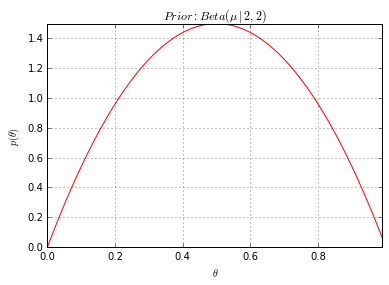

In [29]:
def Beta(theta, a, b):
    val = gamma(a+b)/(gamma(a)*gamma(b)) * theta**(a-1) * (1-theta)**(b-1)
    return val

plt.plot(np.arange(0, 1, 0.01),
         [Beta(theta, 2, 2) for theta in np.arange(0, 1, 0.01)], 'r')
plt.grid(True)
plt.axis('tight')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.title(r'$Prior: Beta(\mu \mid 2,2)$')
plt.show()

- Next, we gather some data $\mathcal{D} = \{H,H,T,T,T,T,T,H,\cdots,T\} :$
- Heads: 75 $\quad$ Tails: 60
    - $\hat \theta_{MLE} = \frac{75}{75+60} \approx 0.556$
- **Posterior distribution:** $\theta \mid \mathcal{D} \sim Beta(\theta \mid 77, 62):$

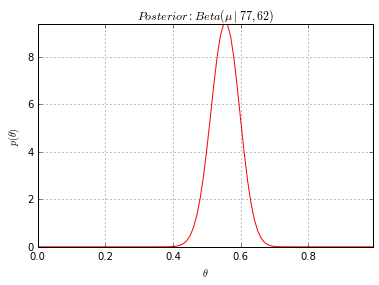

In [31]:
plt.plot(np.arange(0, 1, 0.01),
         [Beta(theta, 77, 62) for theta in np.arange(0, 1, 0.01)], 'r')
plt.grid(True)
plt.axis('tight')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.title(r'$Posterior: Beta(\mu \mid 77,62)$')
plt.show()

# What to do with the Posterior Distribution?

- Look at it.
- xtract a point estimate of $\theta$ (e.g. mean or mode of posterior).
- Extract "credible set" for $\theta$ (a Bayesian confidence interval).
    - e.g. Interval $[a,b]$ is a 95% **credible set** if
$$\mathbb{P} (\theta \in [a,b] \mid D) \geqslant 0.95$$
- The most “Bayesian” approach is **Bayesian decision theory:**
    - Choose a loss function.
    - Find action minimizing "posterior risk"

# Bayesian Decision Theory

- Ingredients:
    - **Action space** $\mathcal{A}$
    - **Parameter space** $\Theta$
    - **Loss function:** $\mathcal{l}:\mathcal{A}\times \Theta \rightarrow \mathbf{R}$
    - **Prior:** Distribution $p(\theta)$ on $\Theta$.
- The **posterior risk** of an action $a \in \mathcal{A}$ is
    $$\begin{array}{ll} r(a) & := & \mathbb{E}[l(\theta, a) \mid \mathcal{D}] \\ & = & \int l(\theta, a) \ p(\theta \mid \mathcal{D}) \ d\theta \end{array} $$
    - It's the **expected loss under the posterior**.
- A **Bayes action** $a^*$ is an action that minimizes posterior risk:
$$r(a^*) = \min_{a \in \mathcal{A}} r(a) $$

# Bayesian Point Estimation

- General Setup:
    - Data $\mathcal{D}$ generated by $p(y \mid \theta)$, for unknown $\theta \in \Theta$.
    - Want to produce a **point estimate** for $\theta$.
- Choose the following:
    - **Loss** $l(\hat \theta, \theta) = \left( \theta - \hat \theta \right)^2$
    - **Prior** $p(\theta)$ on $\Theta$.
- Find **action** $\hat \theta \in \Theta$ that minimizes **posterior risk:**
$$\begin{array}{ll} r(\hat \theta) & = & \mathbb{E} \left[ \left( \theta - \hat \theta \right]^2 \mid \mathcal{D} \right] \\ & = & \int \left(\theta - \hat \theta \right)^2 \ p(\theta \mid \mathcal{D}) \ d\theta \end{array}$$

# Bayesian Point Estimation: Square Loss

- Find **action** $\hat \in \Theta$ that minimizes **posterior risk**
$$r(\hat \theta) = \int \left( \theta - \hat \theta \right)^2 \ p(\theta \mid \mathcal{D} \ d\theta$$
- Differentiate:
$$\begin{array}{ll} {dr(\hat \theta) \over d\hat \theta} & = & - \int 2\left( \theta - \hat \theta \right) \ p(\theta \mid \mathcal{D}) \ d\theta \\ & = & -2 \int \theta p(\theta \mid \mathcal{D}) \ d\theta + 2\hat \theta \int p(\theta \mid \mathcal{D}) \ d\theta \\ & = & -2 \int \theta p(\theta \mid \mathcal{D}) \ d\theta \end{array} $$

# Bayesian Point Estimation: Square Loss

- Derivative of posterior risk is
$${dr(\hat \theta) \over d\hat \theta} = -2\int \theta \ p(\theta \mid \mathcal{D}) \ d\theta + 2\hat \theta.$$
- First order condition ${dr(\hat \theta) \over d\hat \theta} = 0$ gives
$$\begin{array}{ll} \hat \theta & = & \int \theta \ p(\theta \mid \mathcal{D}) \ d\theta \\ & = & \mathbb{E} [\theta \mid \mathcal{D}] \end{array} $$
- **Bayes action** for **square loss** is the posterior mean.

# Bayesian Point Estimation: Absolute Loss

- **Loss:** $l(\theta,\hat \theta) = \left| \ \theta - \hat \theta \ \right|$
- **Bayes action** for **absolute loss** is the **posterior median.**
    - That is, the median of the distribution $p(\theta \mid \mathcal{D})$.
    - Show with approach similar to what was used in Homework #1.

# Bayesian Point Estimation: Zero-One Loss

- Suppose $\Theta$ is discrete (e.g. $\Theta = \{ english, french \}$)
- **Zero-one loss:** $l(\theta, \hat \theta) = \mathbf{1}(\theta \ne \hat \theta )$
- **Posterior risk:**
$$\begin{array}{ll} r(\hat \theta) & = & \mathbb{E} \left[ \mathbf{1} (\theta \ne \hat \theta ) \mid \mathcal{D} \right] \\ & = & \mathbb{P} \left( \theta \ne \hat \theta \mid \mathcal{D} \right ) \\ & = & \mathbf{1} - \mathbb{P} \left( \theta = \hat \theta \mid \mathcal{D} \right) \\ & = & \mathbf{1} - p(\hat \theta \mid \mathcal{D}) \end{array} $$
- **Bayes action** is
$$ \hat \theta = \arg \max_{\theta \in \Theta} \ p(\theta \mid \mathcal{D} )$$
- This $\hat \theta$ is called the **maximum a posteriori (MAP)** estimate.
- The MAP estimate is the mode of the posterior distribution.

# Bayesian Point Estimation: Custom Loss Function

- Suppose $\Theta$ is discrete (e.g. $\Theta = \{english, french\}$)
- **Loss function $l(\hat \theta, \theta)$:**
$$\begin{array}{ll} l(french, english) & = & 10 \\ l(english, french) & = & 1 \\ l(english, english) & = & 0 \\ l(french, french) & = & 0 \end{array}$$
- **Posterior risk:**
$$\begin{array}{ll} r(french) & = & 10p(english \mid \mathcal{D}) + 0p(french \mid \mathcal{D}) \\ r(english) & = & 1p(french \mid \mathcal{D}) + 0p(english \mid \mathcal{D}) \end{array}$$
- **Bayes action** is french iff $r(french) > r(english)$, i.e. when
$${p(english \mid \mathcal{D}) \over p(french \mid \mathcal{D})} > {1 \over 10}.$$

# Bayesian Conditional Models

- Input space $\mathcal{X} = \mathbf{R}^d \quad$ Output space $\mathcal{Y} = \mathbf{R}$
- **Conditional probability model**, or **likelihood model:**
$$\{ p(y \mid  x, \theta) \mid \theta \in \Theta \}$$
    - Conditional here refers to the conditioning on the input $x$.
    - Means that $x$'s are known and not governed by our probability model.

# Gaussian Regression Model

- Input space $\mathcal{X} = \mathbf{R}^d \quad$ Output space $\mathcal{Y} = \mathbf{R}$
- **Conditional probability model**, or **likelihood model:**
$$y \mid x, \theta \sim \mathcal{N} (\theta^T x, \sigma^2),$$
for some known $\sigma^2 > 0$
- **Parameter space** $\Theta = \mathbf{R}^d$
- **Data:** $mathcal{D} = \{ (x_1, y_1), \cdots, (x_n, y_n)\}$
    - Write $y = (y_1, \cdots, y_n)$ and $x = (x_1, \cdots, x_n)$.
    - Assume $y_i$'s are **conditionally independent**, given $x$ and $\theta$.

# Gaussian Likelihood

- The ** likelihood** of $\theta \in \Theta$ for the data $\mathcal{D}$ is
$$\begin{array}{ll} p(y \mid x, \theta) & = & \prod_{i=1}^n p(y_i \mid x_i, \theta) \quad \text{by conditional independence.} \\ & = & \prod_{i=1}^n \left[ {1 \over \sigma \sqrt{2\pi}} \exp{\left( -{(y_i - \theta^T x_i)^2 \over 2\sigma^2}\right) } \right] \end{array}$$
- Recall from the GLM lecture$^1$ that the **MLE** is
$$\begin{array}{ll} \theta_{MLE}^* & = & \arg \max_{\theta \in \mathbf{R}^d} p(y \mid x, \theta) \\ & = & \arg \min_{\theta \in \mathbf{R}^d} \sum_{i=1}^n (y_i - \theta^T x_i)^2 \end{array}$$

# Priors and Posteriors

- Choose a Gaussian prior distribution p(θ) on Θ:
$$\Theta \sim \mathcal{N}(0,\Sigma_0)$$
for some **covariance matrix** $\Sigma_0 \succ 0$ (i.e. $\Sigma_0$ is spd).
- **Posterior distribution**
$$\begin{array}{ll} p(\theta \mid \mathcal{D}) & = & p(\theta \mid x, y) \\
& = & p(y \mid x, \theta) \ p(\theta) / p(y) \\
& \propto & \prod_{i=1}^n \left[{1 \over \sigma \sqrt{2\pi}} \exp{\left( -{(y_i - \theta^T x_i)^2 \over 2 \sigma^2}\right)} \right] \ \text{(likelihood)} \\
& & \ \times \left\vert 2\pi\Sigma_0 \right\vert^{-1/2} \exp{\left( -{1 \over 2} \theta^T \Sigma_0^{-1} \theta \right)} \ \text{(prior)}
\end{array}$$

# Example in 1-Dimension

- Input space $\mathcal{X} = [-1, 1] \quad$ Output space $\mathcal{Y} = \mathbf{R}$
- Basic Gaussian regression model:
$$y = \omega_0 + \omega_1 x + \epsilon,$$
where $\epsilon \sim \mathcal{N}(0,0.2^2)$.
- Written another way, the **likelihood model** is
$$y \mid x, \theta = (\omega_0, \omega_1) \sim \mathcal{N}(\omega_0 + \omega_1 x, 0.2^2).$$
- **Prior distribution:** $\theta = (\omega_0, \omega_1) \sim \mathcal{N}(0, {1 \over 2}I)$
<img src = "./image_files/prior_posterior1.png", width = 300>
- On right, plots of $y = \omega_0 + \omega_1 x$ for random $(\omega_0, \omega_1) \sim p(\theta) = \mathcal{N}(0, {1 \over 2}I).$
- Consider $y$ and $x$ related as $y = \omega_0 + \omega_1 x + \epsilon$, where $\epsilon \sim \mathcal{N}(0, 0.2^2)$.
- **Conditional probability model**, or **likelihood model:**
$$y \mid x, \theta = (\omega_0, \omega_1) \sim \mathcal{N}(\omega_0 + \omega_1 x 0.2^2).$$
- **Prior distribution:** $\theta = (\omega_0, \omega_1) \sim \mathcal{N}(0, {1 \over 2}I)$
<img src = "./image_files/prior_posterior1.png", width = 300>
- On right, plots of $y = \omega_0 + \omega_1 x$ for random $(\omega_0, \omega_1) \sim p(\theta) = \mathcal{N}(0, {1 \over 2}I).$

# Example in 1-Dimension: 1 Observation

<img src = "./image_files/prior_posterior2.png", width = 300>
- On left, the white cross indicates the true parameter values.
- On right, the blue circle indicates the training observation.

# Example in 1-Dimension: 2 and 20 Observations

<img src = "./image_files/prior_posterior3.png", width = 300>

# Predictive Distribution

- Given a new input point $x_{new}$, how to predict $y_{new}$?
- **Predictive distribution**
$$\begin{array}{ll} & & p(y_{new} \mid x_{new}, \mathcal{D}) \\
& = & \int p(y_{new} \mid x_{new}, \theta, \mathcal{D}) \ p(\theta \mid \mathcal{D}) \ d\theta \\
& = & \int p(y_{new} \mid x_{new}, \theta) \ p(\theta \mid \mathcal{D}) \ d\theta \\
\end{array}$$
- For Gaussian regression, posterior and predictive distributions have closed forms.

# Closed Form for Posterior

- Model:
$$\begin{array}{ll} \theta & \sim & \mathcal{N}(0, \Sigma_0) \\
y_i \mid x, \theta & i.i.d. & \mathcal{N}(\theta^T x_i, \sigma^2) \end{array}$$
- Design matrix $X \quad$ Response column vector $y$
- **Posterior distribution is a Gaussian distribution:**
$$\begin{array}{ll} \theta \mid \mathcal{D} & \sim & \mathcal{N}(\mu_P, \Sigma_P) \\
\Sigma_P & = & (\sigma^{-2} X^T X + \Sigma_0^{-1})^{-1} \\
\mu_P & = & \sigma^{-2} \sigma_P X^T y
\end{array}$$
- **Posterior Variance** $\Sigma_P$ gives us a natural **uncertainty measure.**
- **Posterior distribution is a Gaussian distribution:**
$$\begin{array}{ll}
\theta \mid \mathcal{D} & \sim & \mathcal{N}(\mu_P, \Sigma_P) \\
\Sigma_P & = & (\sigma^{-2} X^T X + \Sigma_0^{-1})^{-1} \\
\mu_P & = & \sigma^{-2} \Sigma_P X^T y
\end{array}$$
- Look familiar?
- For the prior variance $\Sigma_0 = {\sigma^2 \over \lambda}l$, we get
$$\mu_P = (X^T X + \lambda I)^{-1} X^T y,$$
which is of course the ridge regression solution.

# Posterior Mean and Posterior Mode (MAP)

- **Posterior density for** $\Sigma_0 = {\sigma^2 \over \lambda}I$:
$$p(\theta \mid \mathcal{D}) \propto \exp{\left( - {\lambda \over 2\sigma^2} \lVert \theta \rVert^2 \right)} \prod_{i=1}^n \exp{\left( - {(y_i - \theta^T x_i)^2 \over 2\sigma^2}\right)}$$
- **To find MAP, sufficient to minimize the log posterior:**
$$\begin{array}{ll}
\hat \theta_{MAP} & = & \arg \min_{\theta \in \mathbf{R}^d} [-\log{p(\theta \mid \mathcal{D}}] \\
& = & \arg \min_{\theta \in \mathbf{R}^d} \prod_{i=1}^n (y_i - \theta^T x_i)^2 + \lambda \lVert \theta \rVert^2
\end{array}$$
- Which is the ridge regression objective.

# Closed Form for Predictive Distribution

- **Model:**
$$\begin{array}{ll}
\theta & \sim & \mathcal{N}(0, \Sigma_0) \\
y_i \mid x, \theta & i.i.d. & \mathcal{N}(\theta^T x_i, \sigma^2)
\end{array}$$
- **Predictive Distribution**
$$p(y_{new} \mid x_{new}, \mathcal{D}) = \int p(y_{new} \mid x_{new}, \theta) \ p(\theta \mid \mathcal{D}) \ d\theta$$
- **Closed form:**
$$\begin{array}{ll}
y_{new} \mid x_{new}, \mathcal{D} & \sim & \mathcal{N}(\nu_{new}, \sigma_{new} \\
\mu_{new} & = & \mu_P^T x_{new} \\
\sigma_{new} & = & x_{new}^T \Sigma_P x_{new} + \sigma^2
\end{array}$$

# Predictive Distributions

- With predictive distributions, can draw error bands:
<img src = "./image_files/predictive.png", width = 300>

# Bayesian Predictive Distributions vs GLMs
- Gaussian regression with MLE, from our GLM lecture:
    - produces a Gaussian for each input $x$.
$$x \mapsto \mathcal{N}(x^T \theta_{MLE}, \sigma^2)$$
- Bayesian predictive distributions:
    - produce a Gaussian for each input $x$
$$x \mapsto \mathcal{N} \left( \theta_{ridge}^T x, x_{new}^T \Sigma_P x_{new} + \sigma^2 \right)$$
- In Bayesian version
    - equivalent to using a regularized least squares fit
    - variance has additional piece from uncertainty in $\theta$

# Coin Flipping

- **Parameter space $\theta \in \Theta = [0, 1]$:**
$$\mathbb{P}(Heads \mid \theta) = \theta.$$
- Data $\mathcal{D} = = {H,H,T,T,T,T,T,H,\cdots,T}$
    - $n_h$: number of heads
    - $n_t$: number of tails
- **Conditional Independence Assumption:**
    - Conditioned on $\theta$, repeated flips are independent
- **Likelihood model** (Bernoulli Distribution):
$$p(\mathcal{D} \mid \theta) = \theta^{n_h}(1 - \theta)^{n_t}$$
    - (probability of getting the flips in the order they were received)

# Coin Flipping: Beta Prior

- **Prior:**
$$\begin{array}{ll}
\theta \sim Beta(h,t)
p(\theta) \propto \theta^{h-1}(1-\theta)^{t-1}
\end{array}
$$
- **Mean of Beta distribution:**
$$\mathbb{E} \theta = {h \over h + t}$$
- Interpret h and t as the number of heads/tails received in a prior experiment.
    - Then $\mathbb{E}\theta$ is the obvious MLE and plug-in estimate for $\theta$.
- For fixed $\mathbb{E}\theta$, $Var(\theta)$ decreases as number of flips $n = h + t$ grows.

# Coin Flipping: Posterior

- **Prior:**
$$\begin{array}{ll}
\theta & \sim & Beta(h, t) \\
p(\theta) & \propto & \theta^{h-1}(1-\theta)^{h-1}
\end{array}
$$
- **Likelibood model:**
$$p(\mathcal{D} \mid \theta) = \theta^{n_h} (1-\theta)^{n_t}$$
- **Posterior density:**
$$\begin{array}{ll}
p(\theta \mid \mathcal{D}) & \propto & p(\theta) \ p(\mathcal{D} \mid \theta) \\
& \propto & \theta^{h-1} (1-\theta)^{t-1} \times \theta^{n_h} (1-\theta)^{n_t} \\
& = & \theta^{h-1+n_h} (1-\theta)^{t-1+n_t}
\end{array}
$$

# Posterior is Beta

- **Prior**
$$\begin{array}{ll}
\theta & \sim & Beta(h, t) \\
p(\theta) & \propto & \theta^{h-1} (1-\theta)^{h-1}
\end{array}$$
- **Posterior density:**
$$p(\theta \mid \mathcal{D}) \propto \theta^{h-1+n_h} (1-\theta)^{t-1+n_t}$$
- **So**
$$\theta \mid \mathcal{D} \sim Beta(h+n_h, t+n_t)$$
- It’s as though we continued our experiment by adding more flips.

# Conjugate Prior Examples

- A prior is conjugate for a likelihood model if the posterior is in the same “family” as the prior.
    - If prior is a beta distribution, and likelihood model is a Bernoulli distribution, then posterior is a beta distribution.
        - Prior and posterior in the same family ⇒ **Beta is a conjugate prior for Bernoulli**
    - If prior is a Gaussian distribution, and likelihood model is a Gaussian distribution, then posterior is a Gaussian distribution.
        - Prior and posterior in the same family ⇒ **Gaussian is a conjugate prior for Gaussian**
- Conjugacy of the prior is really a statement about the prior family.

# Conjugate Prior Family

- Let $\pi$ be a family of prior distributions on $\Theta$.
- Let $P$ be likelihood model with parameter space $\Theta$.
- We say that $\pi$ **is conjugate to** $P$ if for any prior in $\pi$, the posterior is always in $\pi$.
- Trivial Example:
    - The family of all probability distributions is conjugate to any likelihood model.
- Every exponential family has a nontrivial conjugate prior family. (KPM Section 9.2)

# Naive Bayes: A Generative Model for Classification

- $\mathcal{X} = \{ \left( X_1, X_2, X_3, X_4 \in \{ 0, 1\}^4 \right) \quad \mathcal{Y} = \{ 0, 1\}$ be a class label.
- Consider the Bayesian network depicted below:
<img src = "./image_files/naive.png", width = 300>
-  BN structure implies joint distribution factors as:
$$p(x_1, x_2, x_3, x_4, y) = p(y) \ p(x_1 \mid y) \ p(x_2 \mid y) \ p(x_3 \mid y) \ p(x_4 \mid y)$$
- Features $X_1, \cdots, X_4$ are independent given the class label $Y$.

# Parameterized Expression for Joint Distribution

- **Parameters:**
$$\mathbf{P}(Y=1)=\theta_y \qquad \mathbf{P}(X_i=1 \mid Y=1) = \theta_{i1} \qquad \mathbf{P}(X_i=1 \mid Y=0)=\theta_{i0}$$
- **Joint distribution** is
$$\begin{array}{ll}
& & p(x_1, \cdots, x_d, y) \\
& = & p(y) \prod_{i=1}^n p(x_i \mid y) \\
& = & (\theta_y)^y (1-\theta_y)^{1-y} \times \prod_{i=1}^n (\theta_{i1}^{yx_i})(1-\theta_{i1})^{y(1-x_i)} (\theta_{i0}^{(1-y)x_i} (1-\theta_{i0})^{(1-y)(1-x_i)}
\end{array}$$

# Maximum Likelihood Estimators for Naive Bayes

- Training set $\mathcal{D} = \{ (x^1, y^1), \cdots, (x^n, y^n)\}$.
- Obvious “plug-in” estimators for the Naive Bayes model are also MLEs:
$$\begin{array}{ll}
\mathbb{P}(Y=1) & \approx & \hat \theta_y & = & {1 \over n} \sum_{i=1}^n 1(y^i = 1) \\
\mathbb{P}(X_i = 1 \mid Y = 1) & \approx & \hat \theta_{i1} & = & {\sum_{j=1}^n 1(y^j = 1 \ \text{and} \ x_i^j = 1) \over \sum_{j=1}^n 1(y^j = 1)} \\
\mathbb{P}(X_i = 1 \mid Y = 0) & = & \hat \theta_{i0} & = & {\sum_{j=1}^n 1(y^j = 0 \ \text{and} \ x_i^j = 1) \over \sum_{j=1}^n 1(y^j = 0)}
\end{array}$$

# Example: SPAM Classification

- Label $Y \in \mathcal{Y} = \{SPAM, HAM\}$.
- Features $X_i \in \{ 0, 1\}$.
- Bag of words representation:
$$X_i = 1(\text{Email contains word "Private_Jet"})$$p
- After parameter estimation, prediction done with
$$p(SPAM \mid x) \propto p(SPAM) \sum_{i=1}^d \hat p(x_i \mid SPAM)$$.
- Each $\hat p(x_i \mid y)$ is the estimated probability that $x_i$ would be observed (or not) in a SPAM message.
- Issue: What if we never see $X_1 = 1$ when $Y = SPAM$ in $\mathcal{D}$?
    - Then whenever we see $X_1 = 1$, we will predict $p(SPAM \mid x) = 0$.

# The Zero Count Issue

- If any conditional probabilities $\mathbb{P} (X_i = x_i \mid y)$ get estimated as 0,
    - we'll predict 0 probability for some $y$ whenever $x_i$ is observed.
- This is bad:
    - Never want to predict probability 0 if something is possible.
- Worse: This occurrence is not unusual at all for small sample sizes or rare features.

# Laplace Smoothing

- One traditional fix to the 0 count issue is called **Laplace Smoothing.**
- Idea is to add 1 to every empirical count.
- To estimate $\mathbb{P}(X_i = 1 \mid Y = 1)$, use
$$ \hat \theta_{i1} = {1 + \sum_{j=1}^n 1(y^j = 1 \ \text{and} \ x_i^j = 1) \over 1+\sum_{j=1}^n 1(y^j = 1)}$$
- The added 1 is called a **pseudocount.**
- Like assuming every outcome that can occur was observed at least once.
- Seems to solve the problem – but is there a more principled approach?

# Bayesian Naive Bayes
- **Parameters:**
$$ \mathbb{P}(Y = 1) = \theta_y \qquad \mathbb{P}(X_i = 1\mid Y = 1) = \theta_{i1} \qquad \mathbb{P} (X_i = 1 \mid Y = 0) = \theta_{i0}$$
- Put a Beta prior distribution on each parameter.
- **Option 1:** Use posterior mean as point estimate for each parameter, then continue as before.
    - Laplace smoothing is a special case, in which priors are all $Beta(1,1)$.
- **Option 2: Go full Bayesian.**
    - No parameter estimates. Base everything on posterior $\theta \mid \mathcal{D}$.
- Predict with the predictive distribution:
$$y \mid x, \mathcal{D}$$
    - Recall, this is integrating out the parameter θ w.r.t. the posterior distribution.

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>